<a href="https://colab.research.google.com/github/sezinbiner/ClassificationOfCovidXray/blob/main/vgg19%26vgg16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
from tensorflow.python.keras.applications.densenet import DenseNet121
from tensorflow.python.keras.applications.densenet import DenseNet169
from tensorflow.python.keras.applications.densenet import DenseNet201
from tensorflow.python.keras.applications.imagenet_utils import decode_predictions
from tensorflow.python.keras.applications.imagenet_utils import preprocess_input
from tensorflow.python.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.python.keras.applications.inception_v3 import InceptionV3
from tensorflow.python.keras.applications.mobilenet import MobileNet
from tensorflow.python.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.python.keras.applications.nasnet import NASNetLarge
from tensorflow.python.keras.applications.nasnet import NASNetMobile
from tensorflow.python.keras.applications.resnet import ResNet50
from tensorflow.python.keras.applications.resnet import ResNet101
from tensorflow.python.keras.applications.resnet import ResNet152
from tensorflow.python.keras.applications.vgg16 import VGG16
from tensorflow.python.keras.applications.vgg19 import VGG19
from tensorflow.python.keras.applications.xception import Xception
from tensorflow.python.keras.applications.resnet_v2 import ResNet50V2
from tensorflow.python.keras.applications.resnet_v2 import ResNet101V2
from tensorflow.python.keras.applications.resnet_v2 import ResNet152V2


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_dir = "/content/gdrive/MyDrive/bitirme dataset/train"
test_dir = "/content/gdrive/MyDrive/bitirme dataset/test"
validation_dir = "/content/gdrive/MyDrive/bitirme dataset/validation"
class_names = ['covid', 'normal']
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(224, 224),  
        batch_size=20,
        shuffle=True,
        class_mode='binary')
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=20,
        shuffle=True,
        class_mode='binary')
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(224, 224),
        batch_size=1,
        class_mode='binary')

Found 4800 images belonging to 2 classes.
Found 1200 images belonging to 2 classes.
Found 1232 images belonging to 2 classes.


In [4]:
def extract_features(number_of_images, generator, batch_size):
  features = np.zeros(shape=(number_of_images, 7,7,512))
  labels = np.zeros(shape=(number_of_images))
  i = 0
  print("loop")
  for inputs_batch, labels_batch in generator:
      print(i)
      features_batch = extraction_layer.predict(inputs_batch)
      features[i * batch_size : (i + 1) * batch_size] = features_batch
      labels[i * batch_size : (i + 1) * batch_size] = labels_batch
      i += 1
      if i * batch_size >= number_of_images:
          break
  print("loop over")
  return features, labels

In [5]:
def extract_features2(number_of_images, generator, batch_size):
  features = np.zeros(shape=(number_of_images, 7,7,512))
  labels = np.zeros(shape=(number_of_images))
  i = 0
  print("loop")
  for inputs_batch, labels_batch in generator:
      print(i)
      features_batch = extraction_layer.predict(inputs_batch)
      features[i * batch_size : (i + 1) * batch_size] = features_batch
      labels[i * batch_size : (i + 1) * batch_size] = labels_batch
      i += 1
      if i * batch_size >= number_of_images:
          break
  print("loop over")
  return features, labels

In [6]:
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16
from keras.applications.inception_v3 import  InceptionV3
import numpy as np

extraction_layer = VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(224,224,3)
)
extraction_layer.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [7]:
train_features_VGG16, train_labels_VGG16 = extract_features(4800, train_generator, 20)
validation_features_VGG16, validation_labels_VGG16 = extract_features(1200, validation_generator, 20)
test_features_VGG16, test_labels_VGG16 = extract_features(1232, test_generator, 1)

loop
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
loop over
loop
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46

In [8]:
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16
from keras.applications.inception_v3 import  InceptionV3
from tensorflow.python.keras.applications.nasnet import NASNetMobile
import numpy as np

extraction_layer = VGG19(
    weights='imagenet',
    include_top=False,
    input_shape=(224,224,3)
)
extraction_layer.summary()

80142336/80134624 [==============================] - 0s 0us/step
Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
______________________________________________________________

In [9]:
train_features_NasNet, train_labels_NasNet = extract_features2(4800, train_generator, 20)
validation_features_NasNet, validation_labels_NasNet = extract_features2(1200, validation_generator, 20)
test_features_NasNet, test_labels_NasNet = extract_features2(1232, test_generator, 1)

loop
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
loop over
loop
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46

In [10]:
features = np.concatenate([train_features_VGG16, train_features_NasNet], 1)

In [11]:
val_features = np.concatenate([validation_features_VGG16,validation_features_NasNet], 1)

In [12]:
test_features = np.concatenate([test_features_VGG16,test_features_NasNet], 1)

In [18]:
from keras.models import Sequential
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(
    loss='binary_crossentropy',
    optimizer= "adam" ,
    metrics=['accuracy']
)

In [19]:
history = model.fit(features, train_labels_VGG16,
                    epochs=15,
                    batch_size=16,
                    validation_data=(val_features, validation_labels_VGG16))

Epoch 1/15
300/300 [==============================] - 3s 6ms/step - loss: 1.1962 - accuracy: 0.6679 - val_loss: 0.3151 - val_accuracy: 0.8942
Epoch 2/15
300/300 [==============================] - 1s 5ms/step - loss: 0.3900 - accuracy: 0.8036 - val_loss: 0.2346 - val_accuracy: 0.9058
Epoch 3/15
300/300 [==============================] - 1s 5ms/step - loss: 0.3231 - accuracy: 0.8429 - val_loss: 0.2005 - val_accuracy: 0.9400
Epoch 4/15
300/300 [==============================] - 2s 5ms/step - loss: 0.3148 - accuracy: 0.8225 - val_loss: 0.1691 - val_accuracy: 0.9358
Epoch 5/15
300/300 [==============================] - 2s 5ms/step - loss: 0.3064 - accuracy: 0.8023 - val_loss: 0.2414 - val_accuracy: 0.9233
Epoch 6/15
300/300 [==============================] - 1s 5ms/step - loss: 0.3044 - accuracy: 0.8498 - val_loss: 0.1445 - val_accuracy: 0.9433
Epoch 7/15
300/300 [==============================] - 1s 5ms/step - loss: 0.2337 - accuracy: 0.8503 - val_loss: 0.1389 - val_accuracy: 0.9483
Epoch 

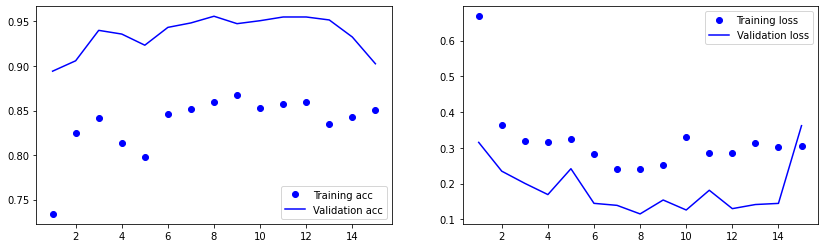

In [20]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

f, axes = plt.subplots(1,2,figsize=(14,4))

axes[0].plot(epochs, acc, 'bo', label='Training acc')
axes[0].plot(epochs, val_acc, 'b', label='Validation acc')
axes[0].legend()

axes[1].plot(epochs, loss, 'bo', label='Training loss')
axes[1].plot(epochs, val_loss, 'b', label='Validation loss')
axes[1].yaxis.set_label_position("right")
axes[1].legend()

plt.show()

In [22]:
from sklearn import metrics
y_pred = model.predict(test_features)
probas = np.array(y_pred)
labels = []
for prob in probas:
  if prob < 0.5:
    labels.append(0)
  else:
    labels.append(1)
y_true_labels = test_labels_VGG16
y_pred_labels = labels
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_true_labels, y_pred_labels)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_true_labels, y_pred_labels,pos_label='positive', average='micro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_true_labels, y_pred_labels, average='micro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_true_labels, y_pred_labels, average='weighted')
print('F1 score: %f' % f1)
from sklearn.metrics import classification_report
print(classification_report(y_true_labels, y_pred_labels, target_names=["covid", "normal"]))
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true_labels, y_pred_labels)

Accuracy: 0.923701
Precision: 0.923701
Recall: 0.923701
F1 score: 0.923310
              precision    recall  f1-score   support

       covid       0.99      0.85      0.92       616
      normal       0.87      1.00      0.93       616

    accuracy                           0.92      1232
   macro avg       0.93      0.92      0.92      1232
weighted avg       0.93      0.92      0.92      1232



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


array([[525,  91],
       [  3, 613]])